## Q1. What is the role of feature selection in anomaly detection?

Ans-Feature selection plays an important role when it comes to improve outlier detection in terms of identifying noisy data that contain irrelevant or redundant features. State-of-the-art work either focuses on unsupervised feature selection for data streams or (offline) outlier detection.

## Q2. What are some common evaluation metrics for anomaly detection algorithms and how are they computed?

Ans-Intuitively Measuring & Explaining Performance. Beyond accuracy, the most commonly used metrics when evaluating anomaly detection solutions are F1, Precision and Recall. One can think about these metrics in the following way: Recall is used to answer the question: What proportion of true anomalies was identified

Recall is used to answer the question: What proportion of true anomalies was identified



       True Positive/(True Positive + False Positive)

Precision answers the question: What proportion of identified anomalies are true anomalies?




           True Positive/(True Positive + False Positive)

F1 Score identifies the overall performance of the anomaly detection model by combining both Recall and Precision, using the harmonic mean

            2*(Recall * Precision)/True Positive + False Positive)

For example:

You are tracking Sales metric as one of your KPIs. You receive a notification that 10 anomalies have been identified. You check the graph and confirm that only 6 dates out of 10 are indeed anomalies. However, you also notice that there are 9 other dates for which the Sales metric behaved unusually and you would consider them to be anomalies. So now you have 6 correctly identified anomalies (True Positive), 4 incorrectly identified anomalies (False Positives) and 9 missed anomalies (False Negatives).

In this scenario the metric values would be:

Recall: 6 / (6 + 9) = 0.4
Precision: 6 / (6 + 4) = 0.6
F1 Score: 2 * (0.4 * 0.6) / (0.4 + 0.6) = 0.48
False Positive and False Negative Rates
When deciding on the anomaly detection system it is important to pay attention to metrics: False Positive and False Negative rates.

False Positive rate helps you understand how many times, on average, will your detector cry wolf and flag the data points that are actually not true anomalies.

        Number of False Anomalies/Total number of  identified Anomalies

In the example above, the False Positive rate is 0.4 or 40% — the system identified 10 anomalies of which only 6 were True anomalies. This means that 40% of the anomalies detected were in fact, not anomalous at all.

## Q3. What is DBSCAN and how does it work for clustering?

Ans-DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

In higher dimensions the circle becomes hypersphere, epsilon becomes the radius of that hypersphere, and minPoints is the minimum number of data points required inside that hypersphere.

DBSCAN is very sensitive to the values of epsilon and minPoints. Therefore, it is very important to understand how to select the values of epsilon and minPoints. A slight variation in these values can significantly change the results produced by the DBSCAN algorithm.

The value of minPoints should be at least one greater than the number of dimensions of the dataset, i.e., 

minPoints>=Dimensions+1.

It does not make sense to take minPoints as 1 because it will result in each point being a separate cluster. Therefore, it must be at least 3. Generally, it is twice the dimensions. But domain knowledge also decides its value.

The value of epsilon can be decided from the K-distance graph. The point of maximum curvature (elbow) in this graph tells us about the value of epsilon. If the value of epsilon chosen is too small then a higher number of clusters will be created, and more data points will be taken as noise. Whereas, if chosen too big then various small clusters will merge into a big cluster, and we will lose details.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(n_samples=750,factor=0.3, noise=0.1)

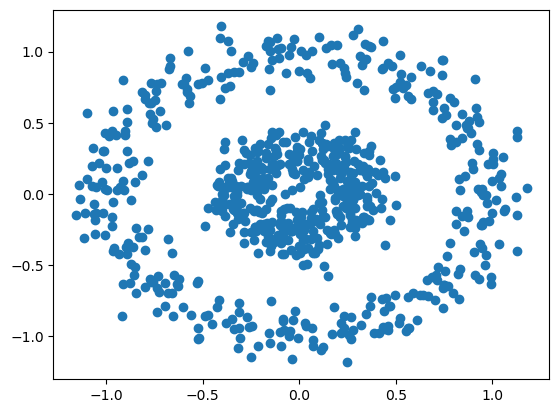

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.cluster import DBSCAN

In [6]:
dbscan=DBSCAN(eps=0.1)

In [7]:
dbscan.fit_predict(X)

array([ 0,  1,  1,  4,  0,  2,  3,  4,  1,  1,  1,  0,  4,  4,  7,  3,  1,
        1,  3,  1,  1,  1,  1, -1,  4,  1,  1,  1,  1,  1,  5,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  3, -1,  2,  1,  6,  4,  7,  1,  1,  4,  8,
        1,  1,  5,  4, -1,  3,  1,  1,  1, -1,  6,  1,  3,  6,  1,  6,  1,
        3,  1,  1,  1,  7,  5,  4,  1,  1,  1,  1,  1,  1,  1,  3,  3, 10,
        3,  1,  5,  1,  1,  8,  4,  1,  1,  1,  1,  6,  1,  8,  0,  5,  1,
        1,  2,  1,  3,  1,  2,  1,  0,  1,  1,  1,  8,  8,  7, -1,  3,  3,
        2,  9,  1,  4,  1,  4,  3, -1,  1, -1,  3,  1, 10,  2,  1,  3,  1,
        1,  2,  1,  6,  1,  4,  1,  1,  6,  1,  3,  1,  4,  4,  4,  0,  1,
        6,  1,  7,  1,  1,  1,  1,  7,  4,  6,  1,  6,  1,  5,  1,  1,  1,
        1,  1,  1,  3,  1,  7,  5,  0,  2,  1,  1,  1,  4, -1,  1,  1,  3,
       -1,  1,  4,  1, -1,  1,  4,  1,  1,  3,  7,  2,  1,  1,  1,  3,  1,
        1,  1,  4,  4,  1,  8,  1,  1,  1,  0, -1, -1,  6,  4,  1, -1,  1,
        4,  1,  1,  7,  1

In [8]:
dbscan.labels_

array([ 0,  1,  1,  4,  0,  2,  3,  4,  1,  1,  1,  0,  4,  4,  7,  3,  1,
        1,  3,  1,  1,  1,  1, -1,  4,  1,  1,  1,  1,  1,  5,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  3, -1,  2,  1,  6,  4,  7,  1,  1,  4,  8,
        1,  1,  5,  4, -1,  3,  1,  1,  1, -1,  6,  1,  3,  6,  1,  6,  1,
        3,  1,  1,  1,  7,  5,  4,  1,  1,  1,  1,  1,  1,  1,  3,  3, 10,
        3,  1,  5,  1,  1,  8,  4,  1,  1,  1,  1,  6,  1,  8,  0,  5,  1,
        1,  2,  1,  3,  1,  2,  1,  0,  1,  1,  1,  8,  8,  7, -1,  3,  3,
        2,  9,  1,  4,  1,  4,  3, -1,  1, -1,  3,  1, 10,  2,  1,  3,  1,
        1,  2,  1,  6,  1,  4,  1,  1,  6,  1,  3,  1,  4,  4,  4,  0,  1,
        6,  1,  7,  1,  1,  1,  1,  7,  4,  6,  1,  6,  1,  5,  1,  1,  1,
        1,  1,  1,  3,  1,  7,  5,  0,  2,  1,  1,  1,  4, -1,  1,  1,  3,
       -1,  1,  4,  1, -1,  1,  4,  1,  1,  3,  7,  2,  1,  1,  1,  3,  1,
        1,  1,  4,  4,  1,  8,  1,  1,  1,  0, -1, -1,  6,  4,  1, -1,  1,
        4,  1,  1,  7,  1

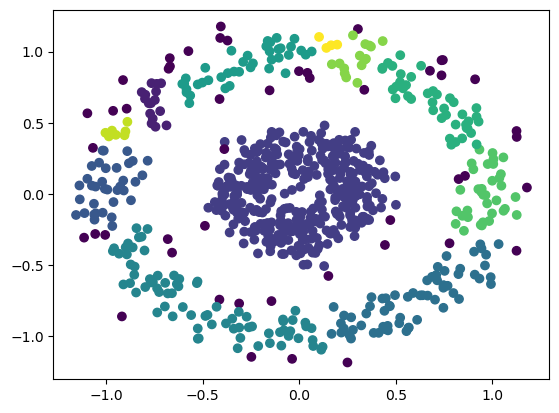

In [9]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_)

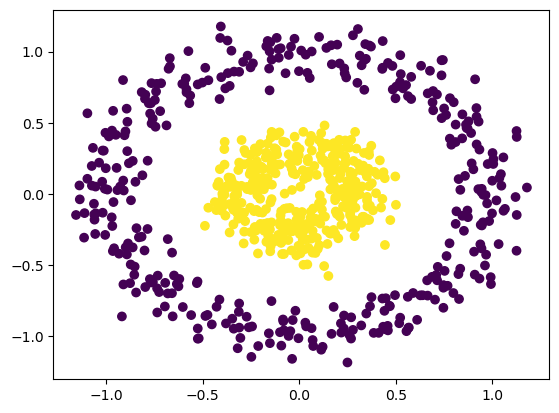

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

## Q4. How does the epsilon parameter affect the performance of DBSCAN in detecting anomalies?

Ans-The major steps followed during the DBSCAN algorithm are as follows:

Step-1: Decide the value of the parameters eps and min_pts.

Step-2: For each data point(x) present in the dataset:

Compute its distance from all the other data points. If the distance is less than or equal to the value of epsilon(eps), then consider that point as a neighbour of x.
If that data point(x) gets the count of its neighbour greater than or equal to min_pts, then mark it as a core point or as visited.
Step-3: For each core point, if it is not already assigned to a cluster then create a new cluster. Further, all the neighbouring points are recursively determined and are assigned the same cluster as that of the core point

Step-4: Repeat the above steps until all the points are visited.

In the case of higher dimensions, the parameter epsilon can be viewed as the radius of that hypersphere and min_pts as the minimum number of data points required inside that hypersphere.

The value for epsilon can then be chosen by using a K-distance Graph, which is a plot of the distance to the k = min_pts – 1 nearest neighbour ordered from the maximum to the minimum value. Then, choose the values of epsilon where this plot shows an “elbow”.
Too small epsilon: If epsilon is chosen much too small, then a large part of the data will not be clustered.
Too large epsilon: If epsilon is chosen much too large, then clusters will merge and the majority of objects will be in the same cluster.
Therefore in general smaller values of epsilon are preferable and usually, only a small fraction of points remain within this distance of each other.

## Q5. What are the differences between the core, border, and noise points in DBSCAN, and how do they relate to anomaly detection?

Ans-DBSCAN algorithm to a particular dataset – Core point, Border point, and noise point.
Core Point: A data point is considered to be a core point if it has a minimum number of neighbouring data points (min_pts) at an epsilon distance from it. These min_pts include the original data points also.
Border Point: A data point that has less than the minimum number of data points needed but has at least one core point in the neighbourhood.
Noise Point: A data point that is not a core point or a border point is considered noise or an outlier.
In other words, we can say that if the number of neighbourhood points around x is greater or equal to MinPts then x is treated as a core point, if the neighbourhood points around x are less than MinPts but are close to a core point then x is treated as a border point. If x is neither a core point nor a border point then x is considered as a noisy point or an outlier.

## Q6. How does DBSCAN detect anomalies and what are the key parameters involved in the process?

Ans-The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster. There are two key parameters ...

There are two key parameters of DBSCAN : eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps. minPts: Minimum number of data points to define a cluster.

## Q7. What is the make_circles package in scikit-learn used for?

Ans-Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification algorithms.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles

In [13]:
X,y = make_circles(n_samples=1000, noise=0.05)

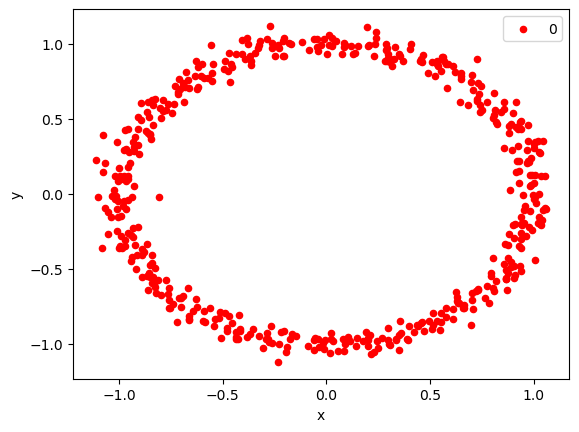

In [14]:
# scatter plot,dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig,ax = plt.subplots()
grouped = df.groupby('label')
for key,group in grouped:
    group.plot(ax=ax, kind='scatter',x='x',y='y',label=key,color=colors[key])
    plt.show()

I then defined the X and y variables, which are independent and dependent variables respectively. The target is the label and was posited in the y variable. The label was dropped from the dataframe, and the remaining part of the dataframe was posited in the X variable.

I then used sklearn’s train_test_split to split the X and y variables up into training and validating sets:

In [15]:
target = df.label
df.drop(['label'],axis=1,inplace=True)

In [16]:
y = target
x = df

In [19]:
# split dataset for training and vaildating
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.10,random_state=1)
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((900, 2), (900,), (100, 2), (100,))

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=1,min_samples_leaf=1,min_samples_split=50,n_estimators=500,criterion='gini',max_depth=10,max_features='log2').fit(x_train,y_train)
print(model).score(x_train,y_train)

ExtraTreesClassifier(max_depth=10, max_features='log2', min_samples_split=50,
                     n_estimators=500, random_state=1)


AttributeError: 'NoneType' object has no attribute 'score'

In [22]:
y_pred = model.predict(x_val)
print(model.score(x_val,y_val))

1.0


In [23]:
y_pred = model.predict(x_val)
print(model.score(x_val,y_val))

1.0


In [24]:
# evaluate
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[54  0]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Q8. What are local outliers and global outliers, and how do they differ from each other?

Ans-There are two general types of outlier detection: global and local. Global outliers fall outside the normal range for an entire dataset, whereas local outliers may fall within the normal range for the entire dataset, but outside the normal range for the surrounding data points.

## Q9. How can local outliers be detected using the Local Outlier Factor (LOF) algorithm?

Ans-The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [25]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [26]:
#Fit the model for outlier detection (default)
#Use fit_predict to compute the predicted labels of the training samples (when LOF is used for outlier detection, the estimator has no predict, decision_function and score_samples methods).

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

## Q10. How can global outliers be detected using the Isolation Forest algorithm?

Ans-Isolation Forest is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature.

Ans-Isolation Forest Anomaly Detection

In [31]:
import pandas as pd
df =pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


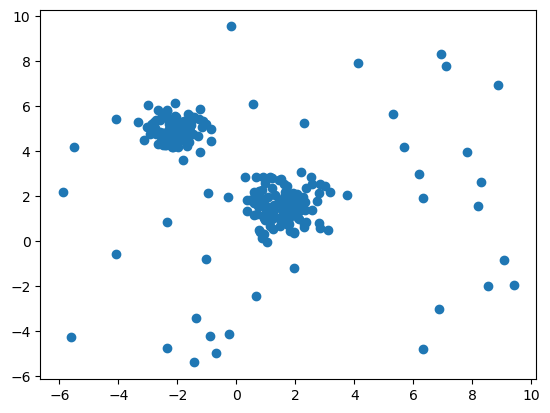

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [33]:
from sklearn.ensemble import IsolationForest

In [34]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [35]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [37]:
import numpy as np
index = np.where(predictions <0)
index

(array([  4,  20,  24,  45,  48,  49,  52,  53,  55,  62,  63,  67,  72,
         74,  78,  83,  85,  87,  92,  97, 104, 108, 114, 119, 126, 130,
        132, 133, 141, 151, 160, 166, 167, 179, 182, 187, 190, 197, 199,
        204, 209, 212, 214, 217, 220, 221, 227, 242, 247, 248]),)

In [38]:
x=df.values

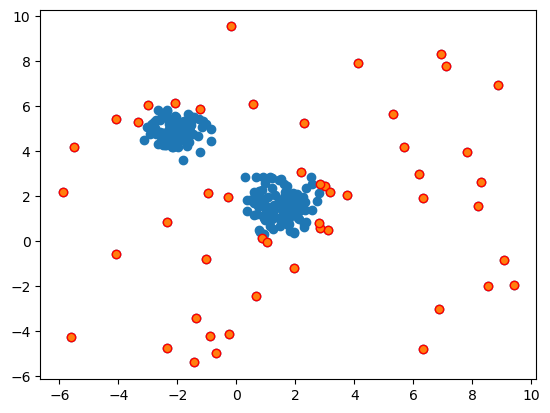

In [39]:
index = np.where(predictions <0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0], x[index,1],edgecolors="r")